# Deaths and Births

To reproduce this example, you need to register to Insee’s API and
configure `pynsee`. Go check [Section 1.3](#sec-config) for details.


In [1]:
# dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pynsee.macrodata import get_dataset_list, get_series_list, get_series

In [2]:
import logging
import sys
logging.basicConfig(stream=sys.stdout,
                    level=logging.INFO, 
                    format="%(message)s")

In [4]:
# Feature engineering
insee_data = get_dataset_list()

df_idbank = get_series_list("DECES-MORTALITE", "NAISSANCES-FECONDITE")

df_idbank = df_idbank.loc[(df_idbank.FREQ == "M") & # monthly
                          (df_idbank.REF_AREA == "FM") & # metropolitan France
                          (df_idbank.DEMOGRAPHIE.isin(["NAISS","DECES"]))] 

# get data
data = get_series(df_idbank.IDBANK)

Existing environment variables used, instead of locally saved credentials


Getting datasets list: 100%|██████████| 201/201 [00:00<00:00, 1594.84it/s]

Locally saved data has been used
Set update=True to trigger an update
Locally saved data has been used
Set update=True to trigger an update



1/1 - Getting series: 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]


In [5]:
data['period'] = pd.cut(
  pd.to_datetime(data['DATE']),
  bins = pd.to_datetime(
    ['1946-01-01', '1975-01-01', '2000-01-01', pd.Timestamp.today().normalize()]),
  labels = ['1946-1975','1975-2000','2000-today']
    )

conditions = [data.IDBANK=="000436391", data.IDBANK=="000436394"]
values_label = ["Births", "Deaths"]
values_color = ["red", "blue"]
data['label'] = np.select(conditions, values_label)
data['color'] = np.select(conditions, values_color)

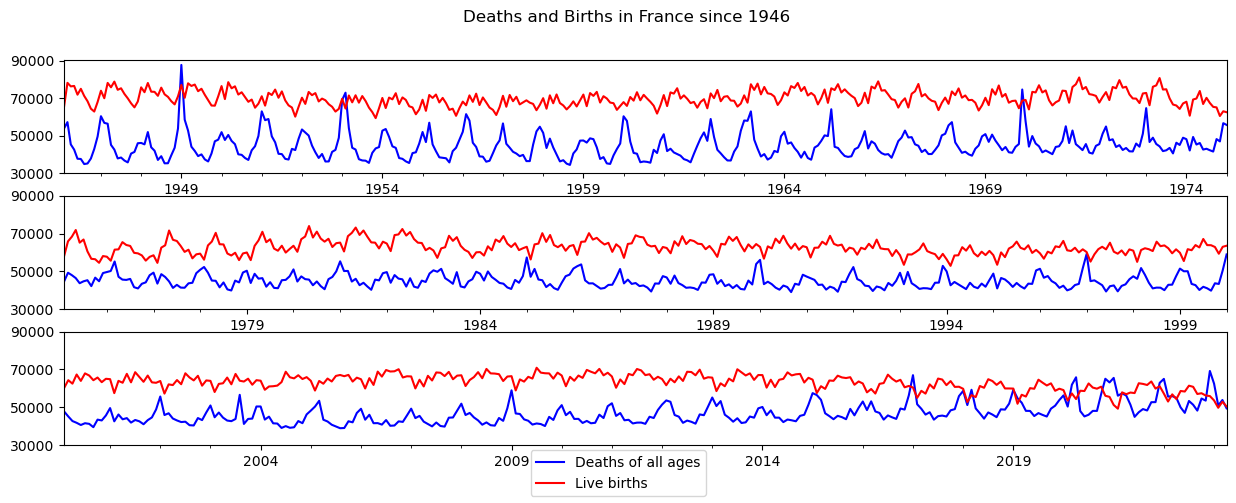

In [6]:
fig, axes = plt.subplots(3,1, figsize=(15,5))
plt.suptitle("Deaths and Births in France since 1946")
for (period, group), ax in zip(data.groupby('period'), axes.flatten()):
    for (var, group2) in group.groupby(['color', 'DEMOGRAPHIE_label_en']):
        group2.plot(x='DATE', y='OBS_VALUE',
                       kind='line', ax=ax,
                        color = var[0], label = var[1],
                        legend=False).xaxis.label.set_visible(False)
        
        ax.set_yticks(list(range(30000,100000,20000)))
  
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center')
plt.show()

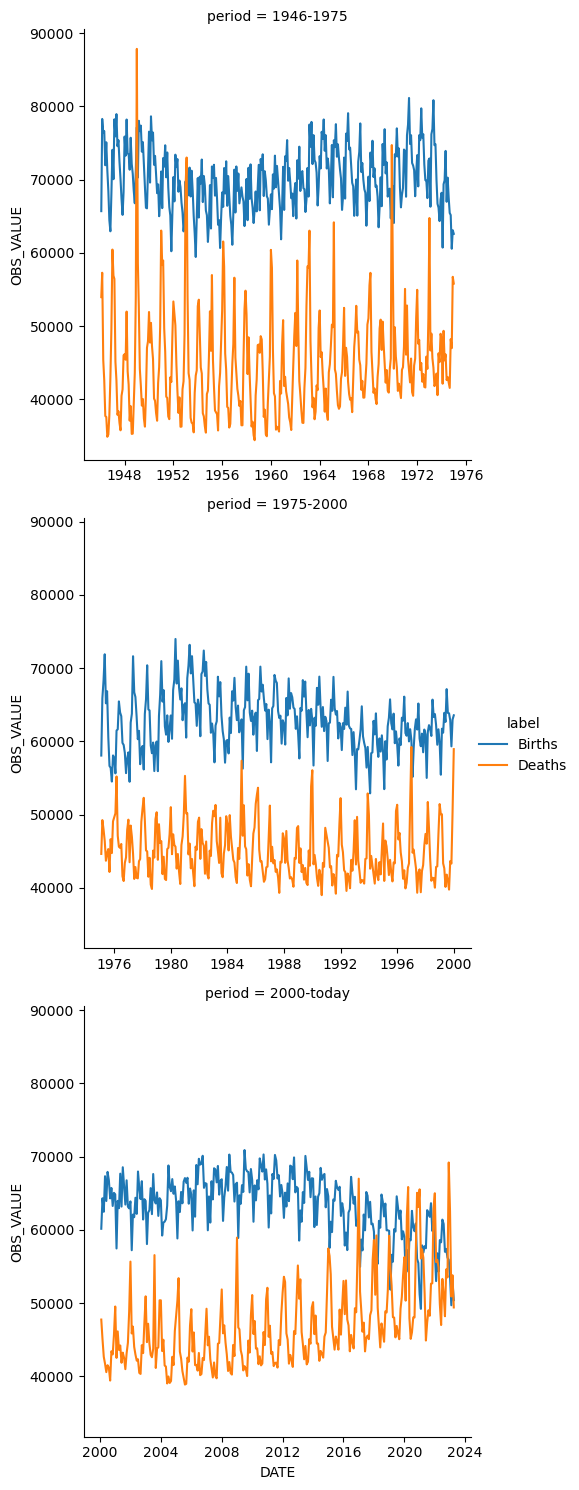

In [7]:
sns.relplot(
    data=data,
    x = "DATE", y = "OBS_VALUE",
    hue="label", row="period",
    kind="line", 
    facet_kws=dict(sharex=False),
)

In [8]:
# Prerequisite
#-   Subscribe to https://api.insee.fr/catalogue/ and get your
#    credentials!
#-   Save your credentials with `init_conn` function :

In [9]:
# Initialize key
from pynsee.utils.init_conn import init_conn
# init_conn(insee_key="my_insee_key", insee_secret="my_insee_secret")

-   Beware : any change to the keys should be tested after having
    cleared the cache

In [10]:
# clear registered keys
from pynsee.utils import clear_all_cache; clear_all_cache()